# Lab 8

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
import random
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import BaggingClassifier as BC
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB
import warnings
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')

In [12]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

## Problem 1

### Part 1


In [13]:
dataset = pd.read_csv(r"D:\IIT Jodhpur CSE\IV SEMESTER II YEAR\PRML\Lab8\train.csv\train2.csv")
dataset

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [15]:
X = dataset.drop("satisfaction",axis = 1)
Y = dataset["satisfaction"]

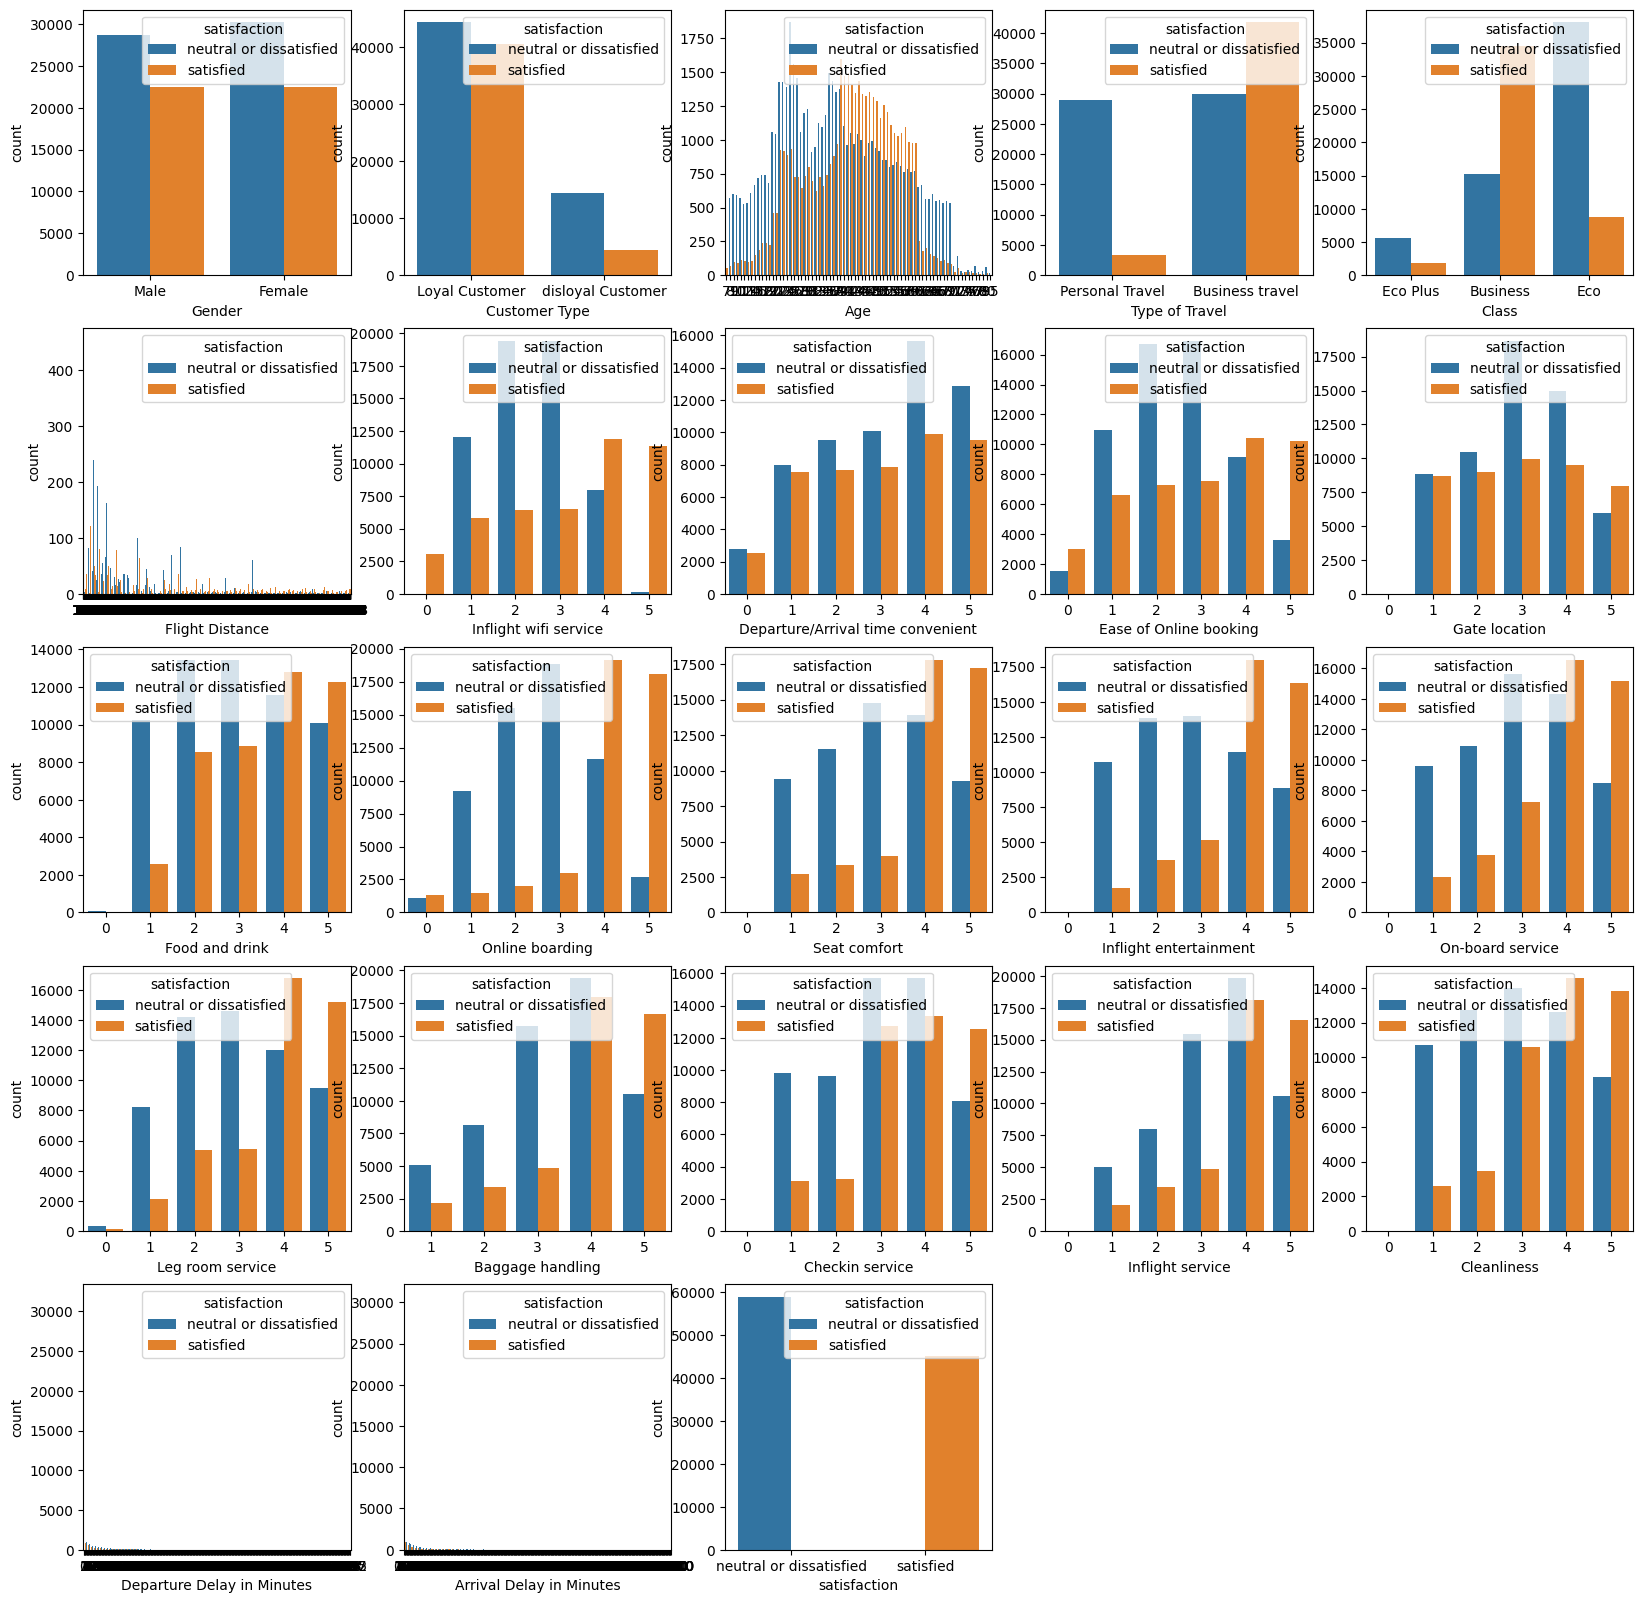

In [16]:
fig = plt.figure(figsize = (20,20))
cnt = 1
for i in dataset.columns[1:]:
  ax = fig.add_subplot(5,5,cnt)
  sns.countplot(data = dataset,x = i,hue = "satisfaction",ax =ax)
  cnt += 1
plt.show()

<AxesSubplot: >

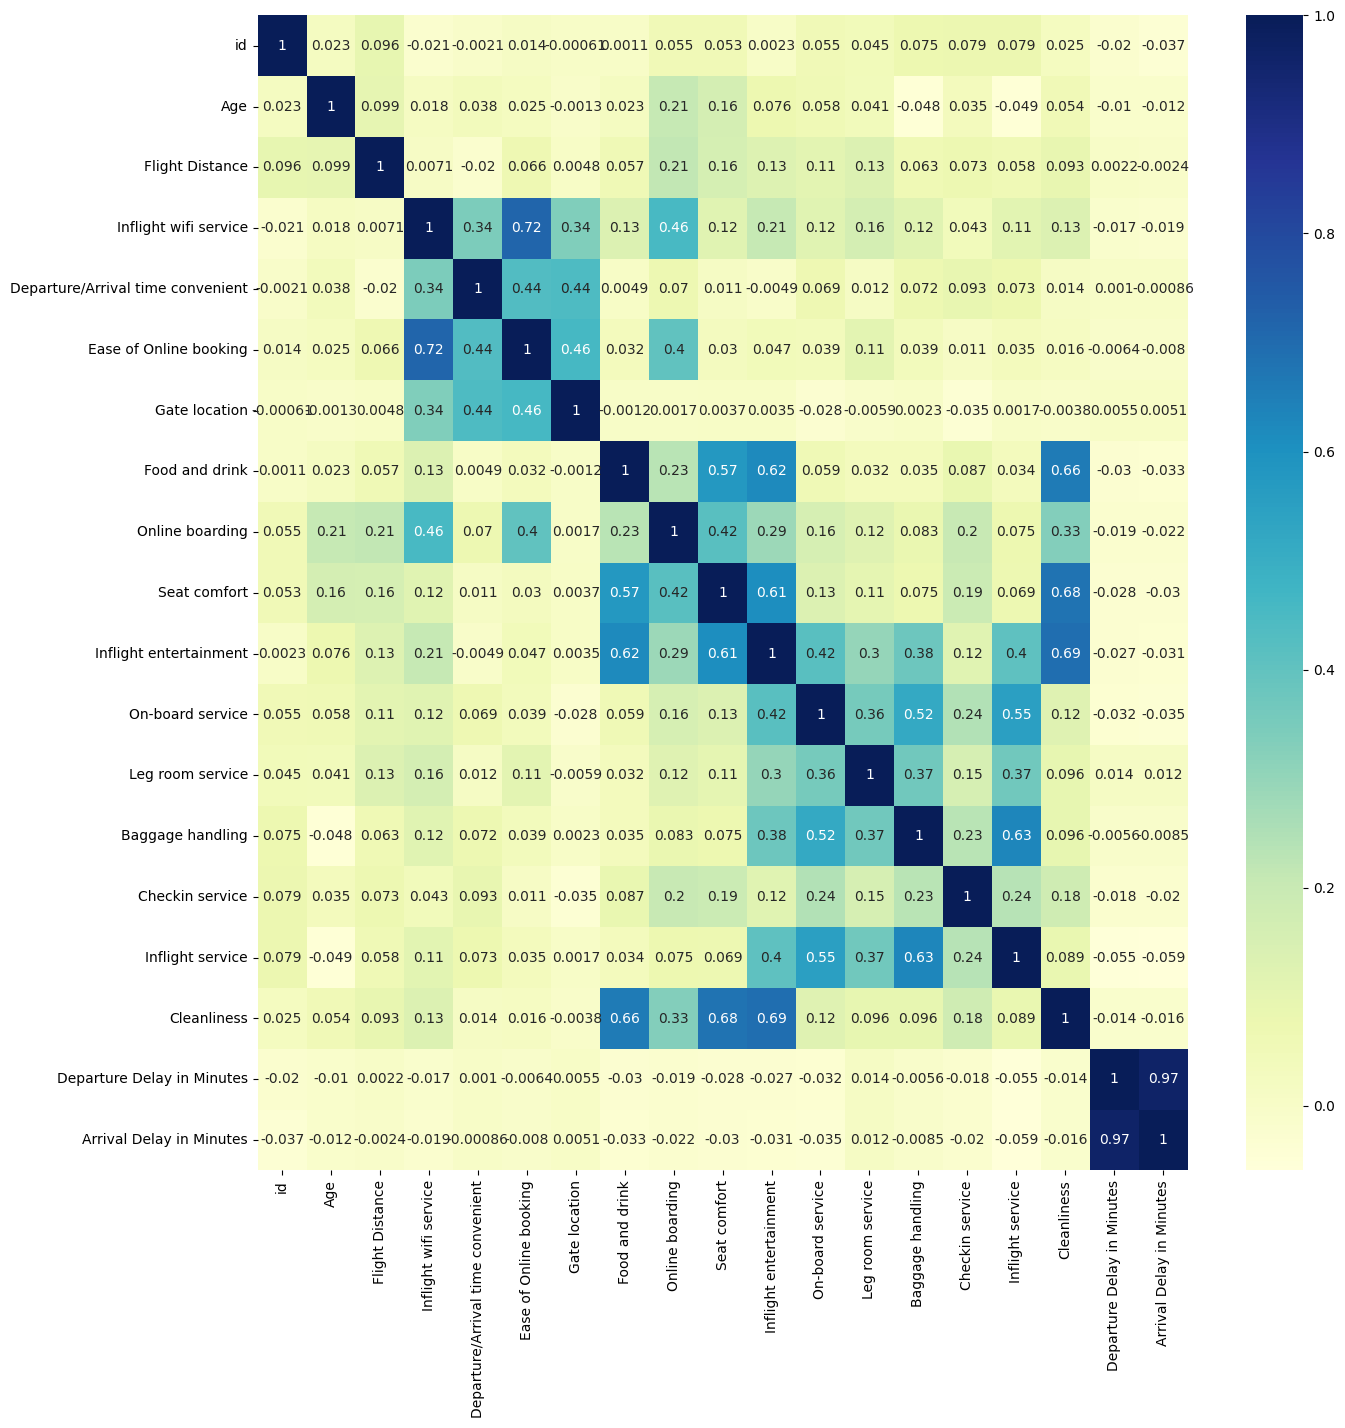

In [17]:
plt.rcParams["figure.figsize"] = (15,15)
sns.heatmap(dataset.corr(),annot =True,cmap = 'YlGnBu')

### Preprocessing

In [18]:
X = dataset.drop("satisfaction",axis = 1)
Y = dataset["satisfaction"]
X

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,5,4,3,4,4,5,5,25,18.0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,1,5,3,1,4,1,1,6.0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,2,3,1,4,2,3,2,3,0.0
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,5,4,0,0.0
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,5,4,3,2,4,5,5,4,7,14.0
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,1,4,5,1,5,4,1,0,0.0


In [19]:
Y

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103904, dtype: object

In [20]:
for i in ["Gender","Customer Type","Type of Travel","Class"]:
  X[i] = LabelEncoder().fit_transform(X[i])
X

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,70172,1,0,13,1,2,460,3,4,3,...,5,5,4,3,4,4,5,5,25,18.0
1,5047,1,1,25,0,0,235,3,2,3,...,1,1,1,5,3,1,4,1,1,6.0
2,110028,0,0,26,0,0,1142,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,24026,0,0,25,0,0,562,2,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,119299,1,0,61,0,0,214,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,0,1,23,0,1,192,2,1,2,...,2,2,3,1,4,2,3,2,3,0.0
103900,73097,1,0,49,0,0,2347,4,4,4,...,5,5,5,5,5,5,5,4,0,0.0
103901,68825,1,1,30,0,0,1995,1,1,1,...,5,4,3,2,4,5,5,4,7,14.0
103902,54173,0,1,22,0,1,1000,1,1,1,...,1,1,4,5,1,5,4,1,0,0.0


In [21]:
X = X.drop("id",axis = 1)

In [22]:
X.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,0.492541,0.182678,39.379706,0.310373,0.594135,1189.448375,2.729683,3.060296,2.756901,2.976883,...,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,0.499947,0.386404,15.114964,0.462649,0.620799,997.147281,1.327829,1.525075,1.398929,1.277621,...,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,0.000000,0.000000,40.000000,0.000000,1.000000,843.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,1.000000,0.000000,51.000000,1.000000,1.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [23]:
X.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
dtype: int64

<AxesSubplot: xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

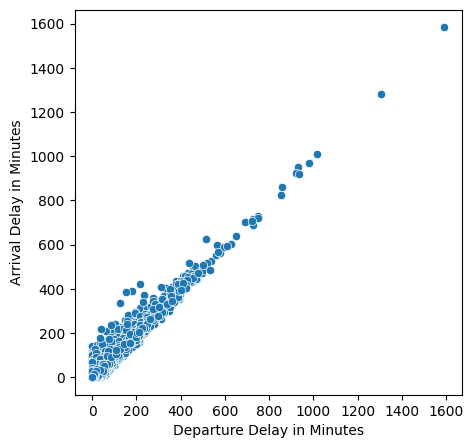

In [24]:
plt.rcParams["figure.figsize"] = (5,5)
sns.scatterplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', data = X)

In [25]:
X = X.drop("Departure Delay in Minutes",axis = 1)
median_val = X['Arrival Delay in Minutes'].median()
X['Arrival Delay in Minutes'] = X['Arrival Delay in Minutes'].fillna(median_val)
X.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Arrival Delay in Minutes             0
dtype: int64

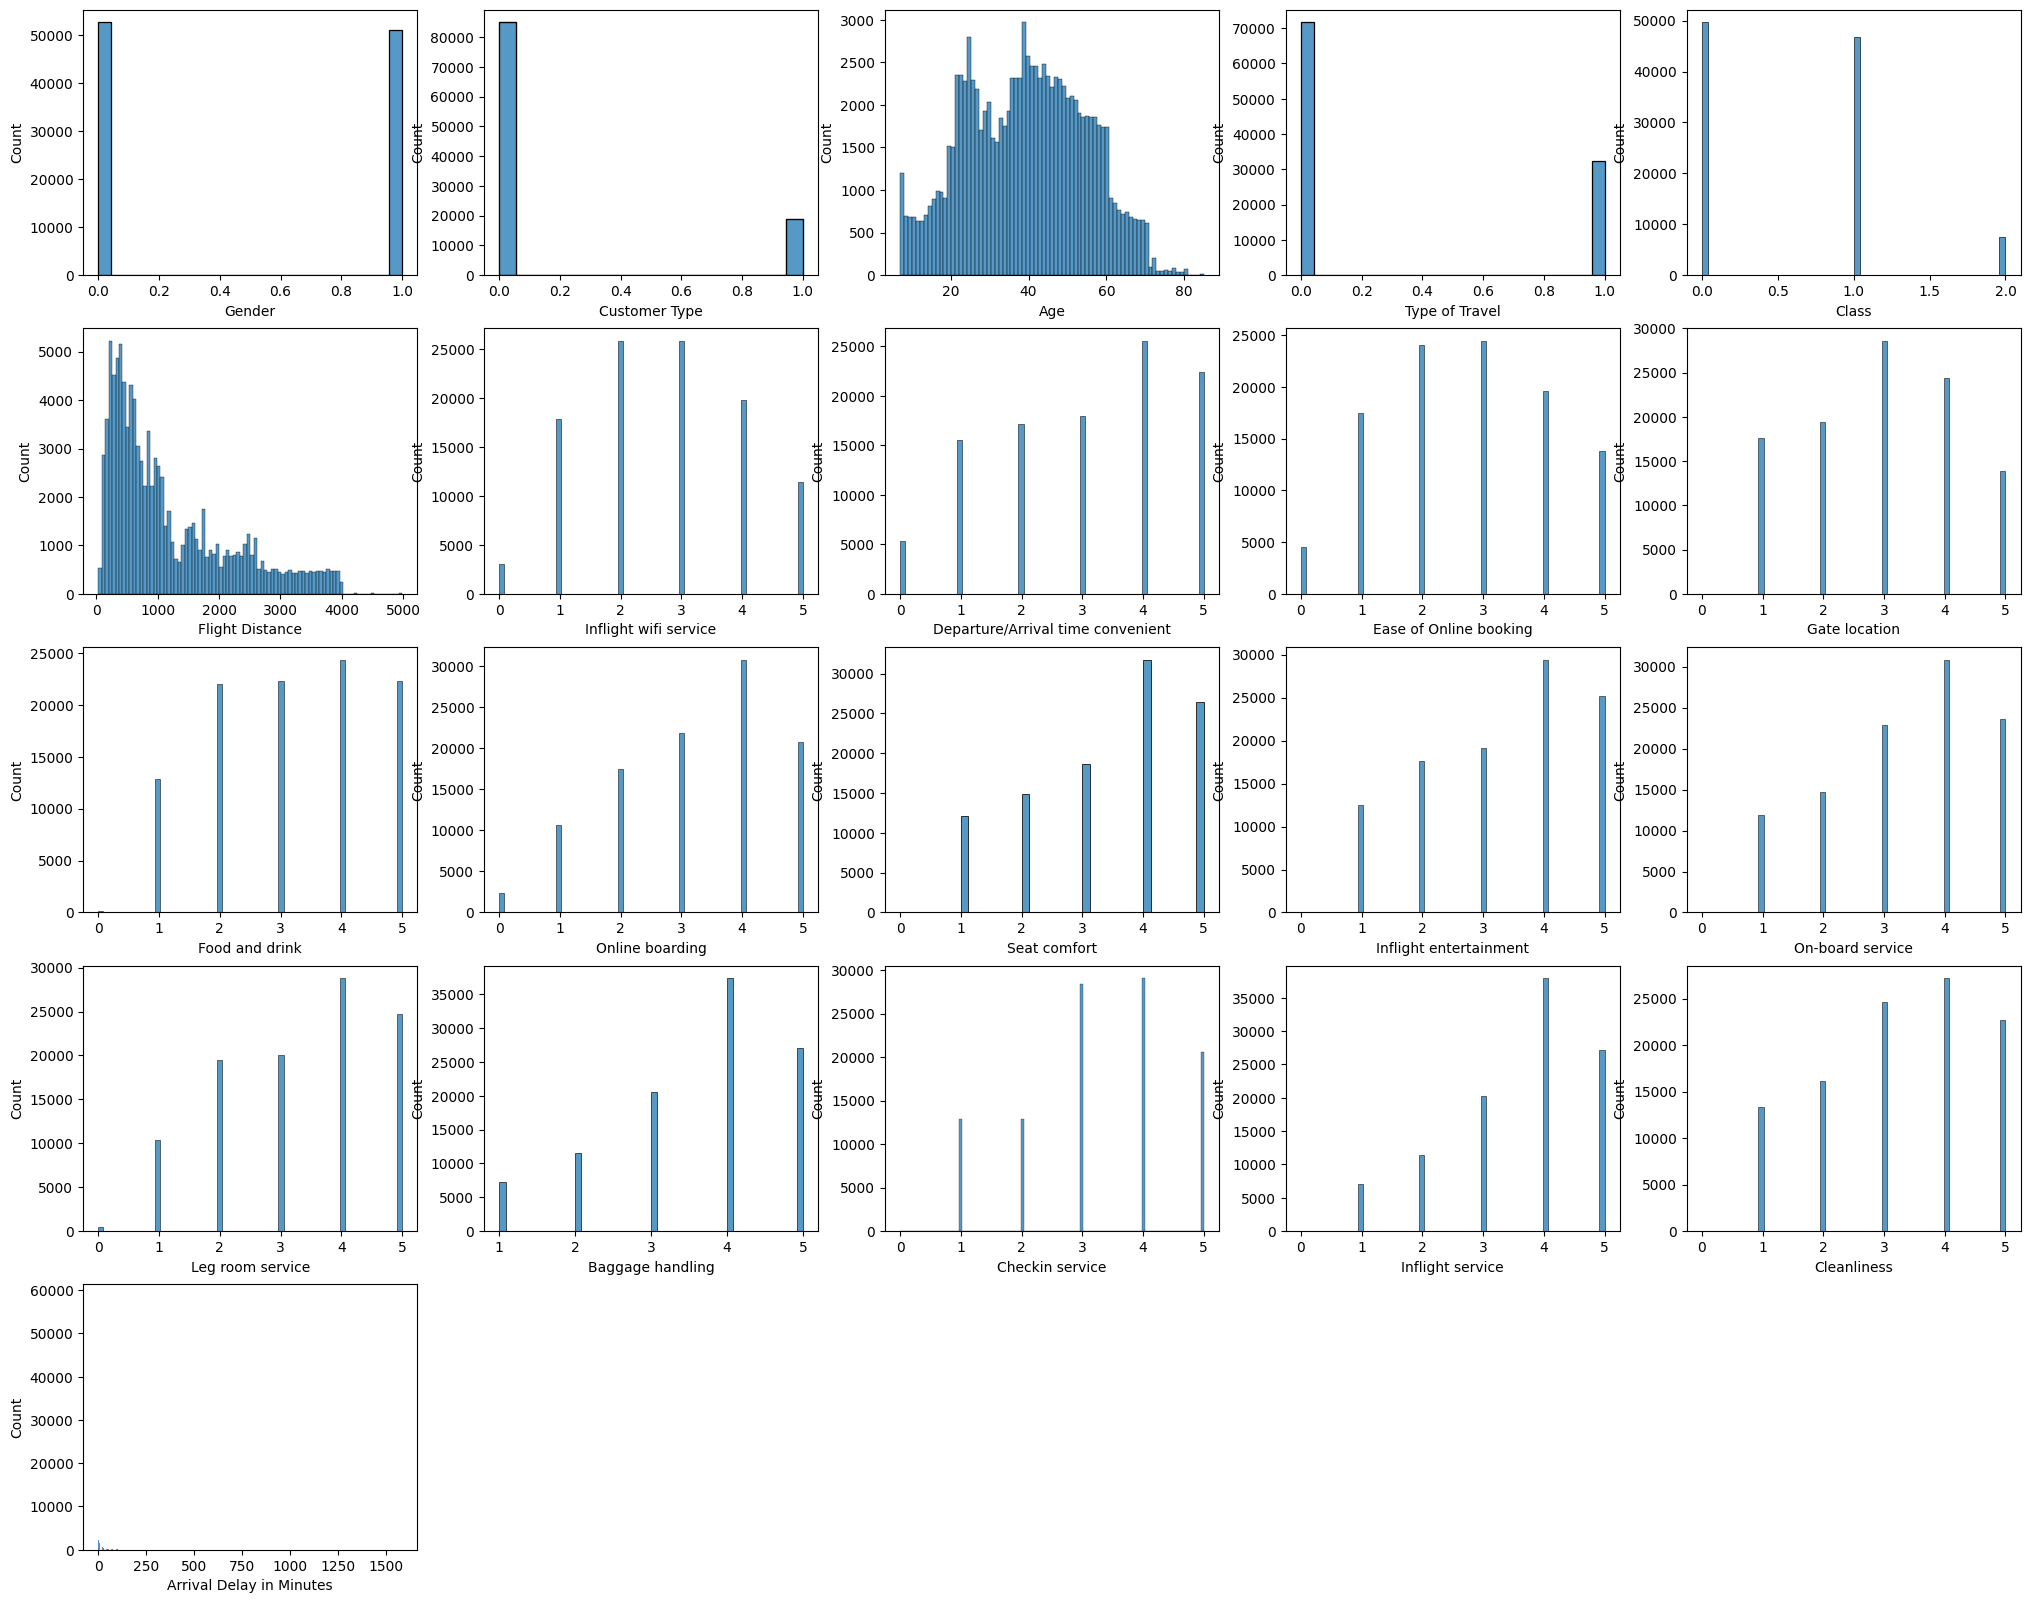

In [26]:
fig = plt.figure(figsize = (25,20))
cnt = 1
for i in X.columns:
  ax = fig.add_subplot(5,5,cnt)
  sns.histplot(X[i])
  cnt += 1
plt.show()

<AxesSubplot: ylabel='Count'>

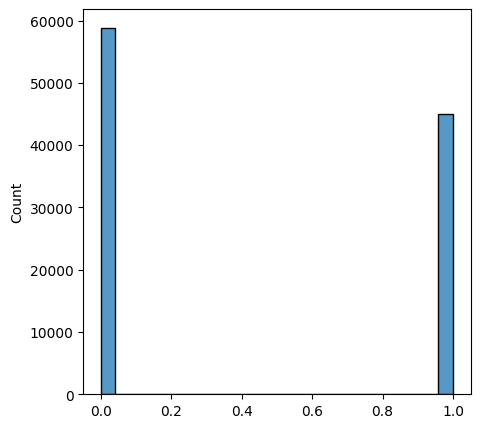

In [27]:
YY = LabelEncoder().fit_transform(Y)
sns.histplot(YY)

In [28]:
X.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,0.492541,0.182678,39.379706,0.310373,0.594135,1189.448375,2.729683,3.060296,2.756901,2.976883,...,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,15.133392
std,0.499947,0.386404,15.114964,0.462649,0.620799,997.147281,1.327829,1.525075,1.398929,1.277621,...,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.649776
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,0.000000,0.000000,40.000000,0.000000,1.000000,843.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000
75%,1.000000,0.000000,51.000000,1.000000,1.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1584.000000


### Part 2

In [ ]:
model = DecisionTreeClassifier(random_state=42)
sfs = SFS(estimator=model,k_features=10,forward=True,floating=False, scoring='accuracy', cv=5) 

sfs.fit(X, Y)

print('Accuracy with all features:',sfs.k_score_)

print('Best 10 features: {}'.format(sfs.k_feature_names_))

### Part 3

In [ ]:
sfs = SFS(estimator=model,k_features=10,forward=True,floating=False, scoring='accuracy', cv=4) 

sfs.fit(X, Y)

print('Accuracy with all features:',sfs.k_score_)

print('Best 10 features: {}'.format(sfs.k_feature_names_))

In [ ]:
sbs = SFS(estimator=model,k_features=10,forward=False,floating=False, scoring='accuracy', cv=4) 

sbs.fit(X, Y)

print('Accuracy with all features:',sbs.k_score_)

print('Best 10 features: {}'.format(sbs.k_feature_names_))

In [ ]:
sffs = SFS(estimator=model,k_features=10,forward=True,floating=True, scoring='accuracy', cv=4) 

sffs.fit(X, Y)

print('Accuracy with all features:',sffs.k_score_)

print('Best 10 features: {}'.format(sffs.k_feature_names_))

In [ ]:
sbfs = SFS(estimator=model,k_features=10,forward=False,floating=True, scoring='accuracy', cv=4) 

sbfs.fit(X, Y)

print('Accuracy with all features:',sbfs.k_score_)

print('Best 10 features: {}'.format(sbfs.k_feature_names_))

### Part 4

In [ ]:
models = [sfs,sbs,sffs,sbfs]
model_names = ["Sequential forward selection","Sequential Backward Selection","Sequential Forward Floating Selection","Sequential Backward Floating Selection"]

In [ ]:
print('For selector =',model_names[0],':\n')

metric_dict = models[0].get_metric_dict()


df = pd.DataFrame.from_dict(metric_dict, orient='index')
df = df[['feature_idx', 'cv_scores', 'avg_score', 'ci_bound']]

df.rename(columns={'feature_idx': 'Feature Subset',
                  'cv_scores': 'CV Scores',
                  'avg_score': 'Mean CV Score',
                  'ci_bound': 'Std CV Score'}, inplace=True)
df

In [ ]:
print('For selector =',model_names[1],':\n')

metric_dict = models[1].get_metric_dict()


df = pd.DataFrame.from_dict(metric_dict, orient='index')
df = df[['feature_idx', 'cv_scores', 'avg_score', 'ci_bound']]

df.rename(columns={'feature_idx': 'Feature Subset',
                  'cv_scores': 'CV Scores',
                  'avg_score': 'Mean CV Score',
                  'ci_bound': 'Std CV Score'}, inplace=True)
df

In [ ]:
print('For selector =',model_names[2],':\n')

metric_dict = models[2].get_metric_dict()


df = pd.DataFrame.from_dict(metric_dict, orient='index')
df = df[['feature_idx', 'cv_scores', 'avg_score', 'ci_bound']]

df.rename(columns={'feature_idx': 'Feature Subset',
                  'cv_scores': 'CV Scores',
                  'avg_score': 'Mean CV Score',
                  'ci_bound': 'Std CV Score'}, inplace=True)
df

In [ ]:
print('For selector =',model_names[3],':\n')

metric_dict = models[3].get_metric_dict()


df = pd.DataFrame.from_dict(metric_dict, orient='index')
df = df[['feature_idx', 'cv_scores', 'avg_score', 'ci_bound']]

df.rename(columns={'feature_idx': 'Feature Subset',
                  'cv_scores': 'CV Scores',
                  'avg_score': 'Mean CV Score',
                  'ci_bound': 'Std CV Score'}, inplace=True)
df

In [ ]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (SFS)')
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.show()

In [ ]:
fig = plot_sfs(sbs.get_metric_dict(), kind='std_err')
plt.title('Sequential Backward Selection (SBS)')
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.show()

In [ ]:
fig = plot_sfs(sffs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Floating Selection (SFFS)')
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.show()

In [ ]:
fig = plot_sfs(sbfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Backward Floating Selection (SFFS)')
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.show()

## Problem 2

### Part 1

In [ ]:
cov = np.array([[0.60066771, 0.148898789, 0.244939], [0.148898789, 0.58982531, 0.24154981], [0.244939, 0.24154981, 0.48778655]])
v = np.array([[1/np.sqrt(6)],[1/np.sqrt(6)],[-2/np.sqrt(6)]])
mean = np.array([0,0,0])
data = np.random.multivariate_normal(mean,cov,size = 1000)
labels = np.zeros(1000, dtype=int)
for i in range(len(data)):
  if(data[i].dot(v) > 0):
    labels[i] = 0
  else:
    labels[i] = 1
data = np.c_[data,labels]

In [ ]:
dataset = pd.DataFrame(data = data,columns = ["X1","X2","X3","class"])
dataset

In [ ]:
traces = []
for i in range(2):
    mask = (labels == i)
    trace = go.Scatter3d(x=data[mask,0], y=data[mask,1], z=data[mask,2],
                         mode='markers', marker=dict(size=2),
                         name='Label {}'.format(i))
    traces.append(trace)

layout = go.Layout(title='3D Scatter Plot', margin=dict(l=0, r=0, b=0, t=0))
fig = go.Figure(data=traces, layout=layout)
fig.show()

### Part 2

In [ ]:
pca = PCA(n_components=3)
pca_data = pca.fit_transform(dataset[["X1","X2","X3"]],)
pca_data = pd.DataFrame(pca_data,columns = [["X1t","X2t","X3t"]])
pca_data["class"] = dataset["class"]
pca_data

### Part 3

In [ ]:
X_train, X_test, Y_train, Y_test = tts(pca_data.drop("class",axis =1), pca_data["class"], test_size=0.3, random_state=42)

In [ ]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

In [ ]:
feature_subsets = [(0, 1), (0, 2), (1, 2)]

for subset in feature_subsets:
    X_subset = X_train[:, subset]
    clf = DecisionTreeClassifier()
    clf.fit(X_subset, Y_train)

    plt.figure()
    plt.scatter(X_subset[:, 0], X_subset[:, 1], c=Y_train, cmap=plt.cm.RdYlBu)
    plt.xlabel('PC{}'.format(subset[0]+1))
    plt.ylabel('PC{}'.format(subset[1]+1))
    plt.title('Decision Boundary for PC{} and PC{}'.format(subset[0]+1, subset[1]+1))
    plot_step = 0.02
    x_min, x_max = X_subset[:, 0].min() - 1, X_subset[:, 0].max() + 1
    y_min, y_max = X_subset[:, 1].min() - 1, X_subset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.5)
    plt.show()

### Part 4

In [ ]:
accuracies = {}
for subset in feature_subsets:
    X_subset = X_train[:, subset]
    clf = DecisionTreeClassifier()
    clf.fit(X_subset, Y_train)
    y_pred = clf.predict(X_test.to_numpy()[:, subset])
    accuracies[subset] = accuracy_score(Y_test.to_numpy(), y_pred)

clf_pca = DecisionTreeClassifier()
clf_pca.fit(X_train, Y_train)
y_pred_pca = clf_pca.predict(X_test)
accuracies[tuple((0,1,2))] = accuracy_score(Y_test, y_pred_pca)

for subset, acc in (accuracies.items()):
    print('Subset:', subset, 'Accuracy:', acc)

In [ ]:
pca = PCA(n_components = 2)
pca_data_2 = pca.fit(dataset.drop("class",axis = 1))
pca_red = pca.transform(dataset.drop("class",axis = 1))
pca_red

In [ ]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = tts(pca_red,dataset["class"], test_size=0.3, random_state=42)

In [ ]:
clf_pca_2 = DecisionTreeClassifier()
clf_pca_2.fit(X_train_2, Y_train_2)
y_pred_pca_2 = clf_pca_2.predict(X_test_2)
print(accuracy_score(Y_test_2,y_pred_pca_2))

In [ ]:
plt.figure()
plt.scatter(X_train_2[:, 0], X_train_2[:, 1], c=Y_train_2, cmap=plt.cm.RdYlBu)
plot_step = 0.02
x_min, x_max = X_train_2[:, 0].min() - 1, X_train_2[:, 0].max() + 1
y_min, y_max = X_train_2[:, 1].min() - 1, X_train_2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                      np.arange(y_min, y_max, plot_step))
Z = clf_pca_2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.5)
plt.show()

In [ ]:
dataset.drop("class",axis = 1).cov()

In [ ]:
for feature in feature_subsets:
  print(feature)
  dis = np.linalg.norm(X_train[:, feature] -X_train_2,ord = 'fro')
  print(dis,end = "\n")